In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
data = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
 # Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


## EDA

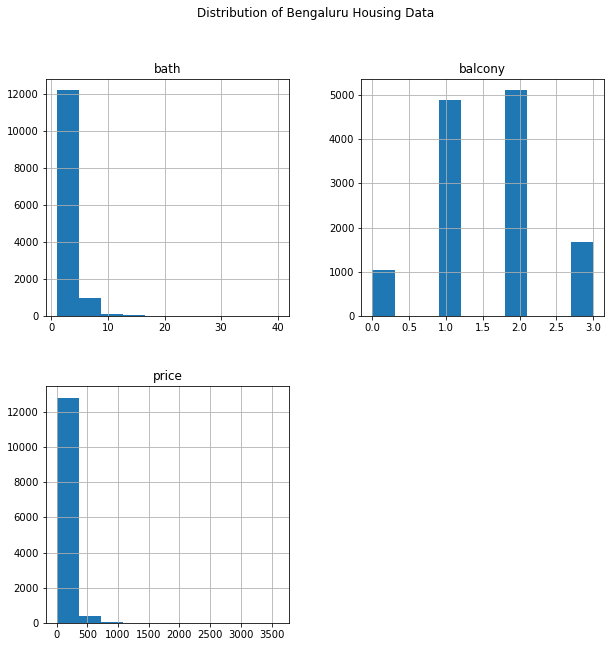

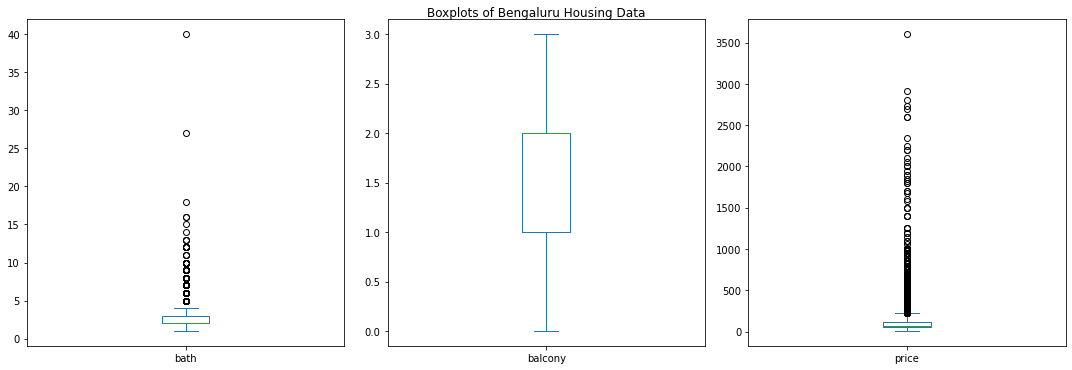

                   area_type   availability    location   size  society  \
count                  13320          13320       13319  13304     7818   
unique                     4             81        1305     31     2688   
top     Super built-up  Area  Ready To Move  Whitefield  2 BHK  GrrvaGr   
freq                    8790          10581         540   5199       80   
mean                     NaN            NaN         NaN    NaN      NaN   
std                      NaN            NaN         NaN    NaN      NaN   
min                      NaN            NaN         NaN    NaN      NaN   
25%                      NaN            NaN         NaN    NaN      NaN   
50%                      NaN            NaN         NaN    NaN      NaN   
75%                      NaN            NaN         NaN    NaN      NaN   
max                      NaN            NaN         NaN    NaN      NaN   

       total_sqft          bath       balcony         price  
count       13320  13247.000000  1271

In [6]:
# Explore data distribution (histograms, boxplots)
data.hist(figsize=(10, 10))
plt.suptitle("Distribution of Bengaluru Housing Data")
plt.show()

data.plot(kind="box", subplots=True, layout=(3, 3), figsize=(15, 15))
plt.suptitle("Boxplots of Bengaluru Housing Data")
plt.tight_layout()
plt.show()

# Analyze numerical features (descriptive statistics, correlations)
print(data.describe(include="all"))

correlation = data.corr(method="spearman")  # Use Spearman's rank for mixed data types
print("Correlation matrix:\n", correlation)

In [7]:
# Check for missing values
print(data.isnull().sum())

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [8]:
# Drop rows with missing values
data.dropna(inplace=True)

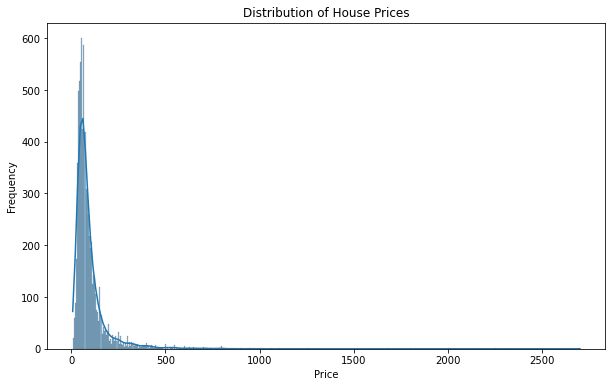

In [9]:
# Visualize distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


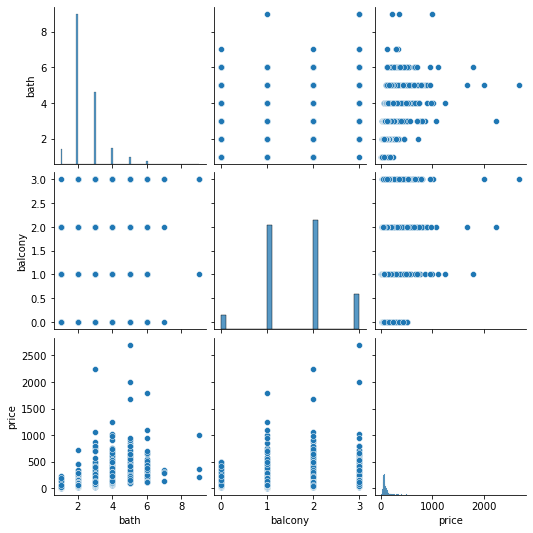

In [10]:
# Visualize relationship between numerical features and target variable
sns.pairplot(data[['total_sqft', 'bath', 'balcony', 'price']])
plt.show()

In [11]:
# Feature Engineering
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['area_type', 'availability', 'location', 'size', 'society', 'total_sqft'], drop_first=True)


In [12]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['bath', 'balcony']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [13]:
# Train-test split
X = data.drop(columns=['price'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Model Training
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [15]:
# Model Evaluation
y_pred_train = svm_regressor.predict(X_train)
y_pred_test = svm_regressor.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)


Train MSE: 6522.786794210786
Test MSE: 6935.188814399246


In [16]:
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
print('Train R^2 Score:', train_r2)
print('Test R^2 Score:', test_r2)

Train R^2 Score: 0.4110994804169772
Test R^2 Score: 0.3815226398463971
